/tmp/ipython-input-445362977.py:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dust=dust.fillna(method='bfill')


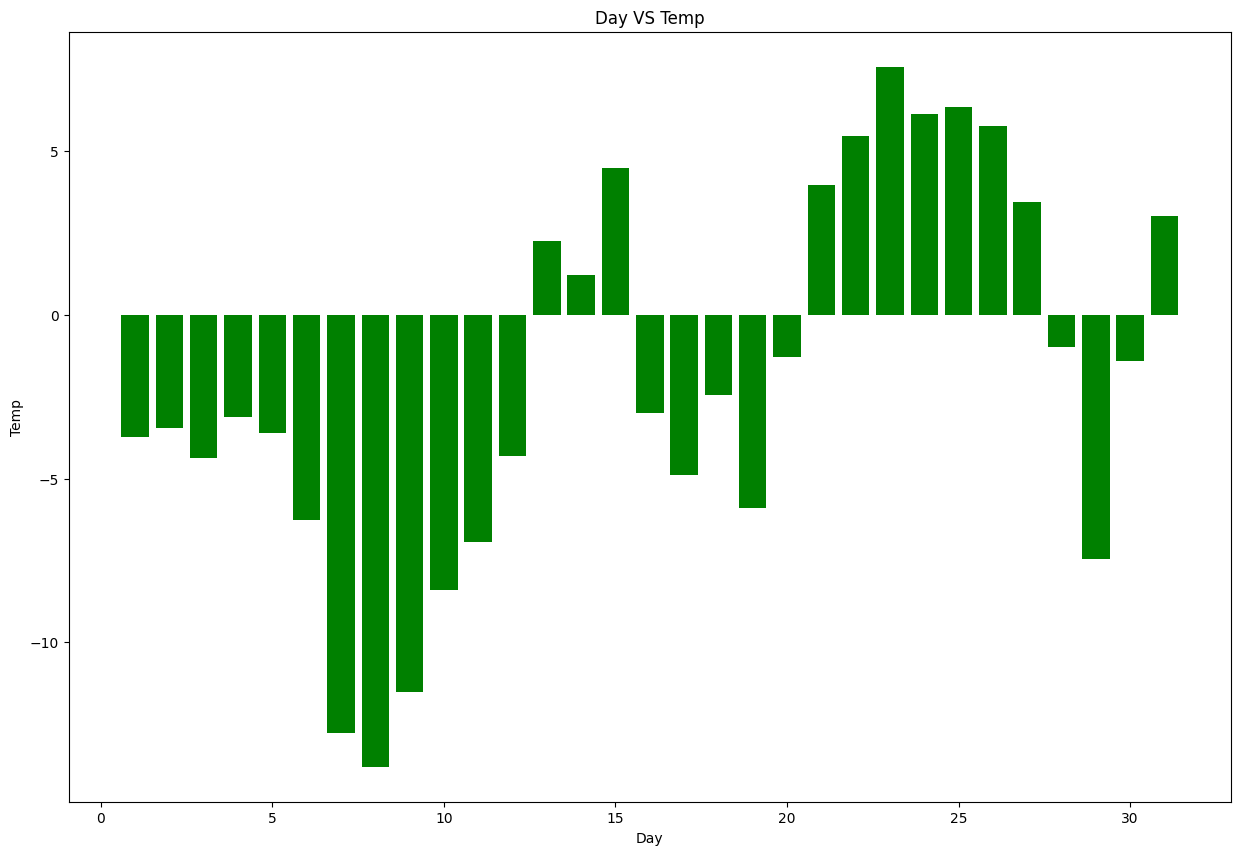

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dust=pd.read_excel('dust.xlsx')
weather=pd.read_excel('weather.xlsx')

dust.rename(columns={'날짜' : 'date', '아황산가스' : 'so2', '일산화탄소' : 'co', '오존' : 'o3', '이산화질소' : 'no2'}, inplace=True)
dust['date']=dust['date'].str[:11]
dust['date']=pd.to_datetime(dust['date'])
dust['year']=dust['date'].dt.year
dust['month']=dust['date'].dt.month
dust['Day']=dust['date'].dt.day

dust.isnull().sum()

dust=dust.fillna(method='bfill')
dust.fillna(20, inplace=True)

weather.drop('지점', axis=1, inplace=True)
weather.drop('지점명', axis=1, inplace=True)
weather.columns=['date', 'temp', 'wind', 'rain', 'humid']
weather['date']=pd.to_datetime(weather['date']).dt.date
weather['date']=weather['date'].astype('datetime64[ns]')
weather['rain']=weather['rain'].replace([0], 0.01)
weather['rain'].value_counts()

df=pd.merge(dust, weather, on='date')

plt.figure(figsize=(15,10))
m=df.groupby('Day')['temp'].mean()
x=pd.DataFrame(m)
plt.title('Day VS Temp')
plt.bar(x.index, m, color='g')
plt.xlabel('Day')
plt.ylabel('Temp')
plt.show()